In [1]:
import uproot as up
import awkward as ak
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

In [2]:
def load_data(root_path: str, collection: str, tree_name: str = "dp", event: int = 0):
    with up.open(root_path) as f:
        node = f[tree_name].arrays([f"{collection}_{i}" for i in ["x", "y", "z"]])
        edge = f[tree_name].arrays([f"{collection}_{i}" for i in ["start", "end"]])
        truth = f[tree_name].arrays([f"{collection}_{i}" for i in ["truth"]])

    if event == -1:
        return {
            'node': node,
            'edge': edge,
            'truth': truth,
        }
    else:
        return {
            'node': node[event],
            'edge': edge[event],
            'truth': truth[event],
        }

In [3]:
def process_graph_data(graph_data, collection: str):
    node = ak.to_dataframe(graph_data['node'])
    edge = ak.to_dataframe(graph_data['edge'])
    truth = ak.to_dataframe(graph_data['truth'])

    out_df = {}
    for key, value in graph_data.items():
        df = ak.to_dataframe(value)
        df.columns = df.columns.str.replace(f"{collection}_", "")
        out_df[key] = df

    return out_df

In [4]:
def plot_xyz(ax, d, x, y):
    sns.set_style(style='whitegrid')
    sns.scatterplot(ax=ax, data=d['node'], x=x, y=y)

    for i in range(len(d['edge'])):
        if d['truth'].iloc[i]['truth'] == 0: continue
        sns.lineplot(
            ax=ax,
            x=[
                d['node'].iloc[d['edge'].iloc[i][f'start']][x],
                d['node'].iloc[d['edge'].iloc[i][f'end']][x]
            ],
            y=[
                d['node'].iloc[d['edge'].iloc[i][f'start']][y],
                d['node'].iloc[d['edge'].iloc[i][f'end']][y]
            ],
            color='black'
        )

In [5]:
col = 'TagTrk1'

d = load_data(r'/Users/avencast/CLionProjects/darkshine-simulation/workspace/Tracker_GNN.root', col, event=0)
d = process_graph_data(d, col)

In [9]:
d['edge'].to_numpy().transpose()

array([[  0,   0,   0, ..., 119, 119, 119],
       [ 20,  21,  22, ..., 138, 139, 140]], dtype=uint64)

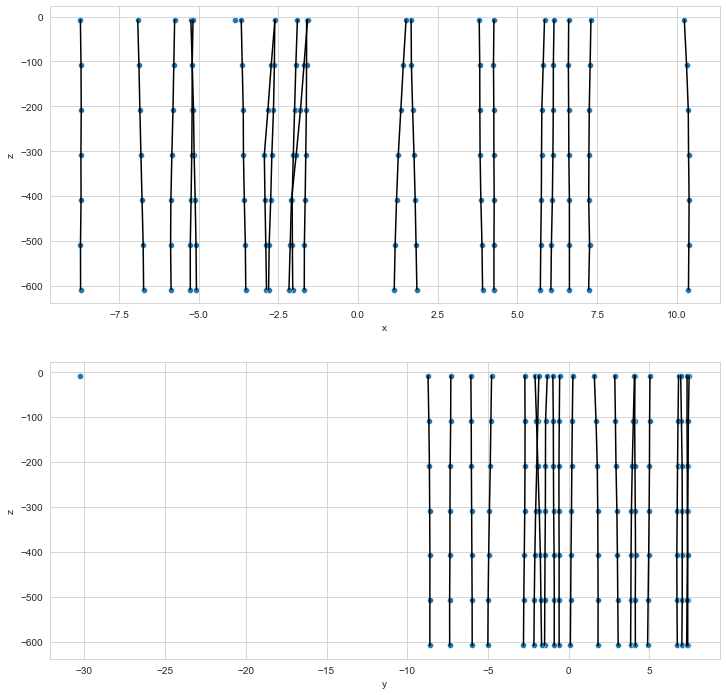

In [35]:
fig, axs = pyplot.subplots(2, figsize=(12, 12))
col = 'TagTrk1'

d = load_data(r'/Users/avencast/CLionProjects/darkshine-simulation/workspace/Tracker_GNN.root', col, event=0)
d = process_graph_data(d, col)

plot_xyz(axs[0], d, "x", "z")
plot_xyz(axs[1], d, "y", "z")

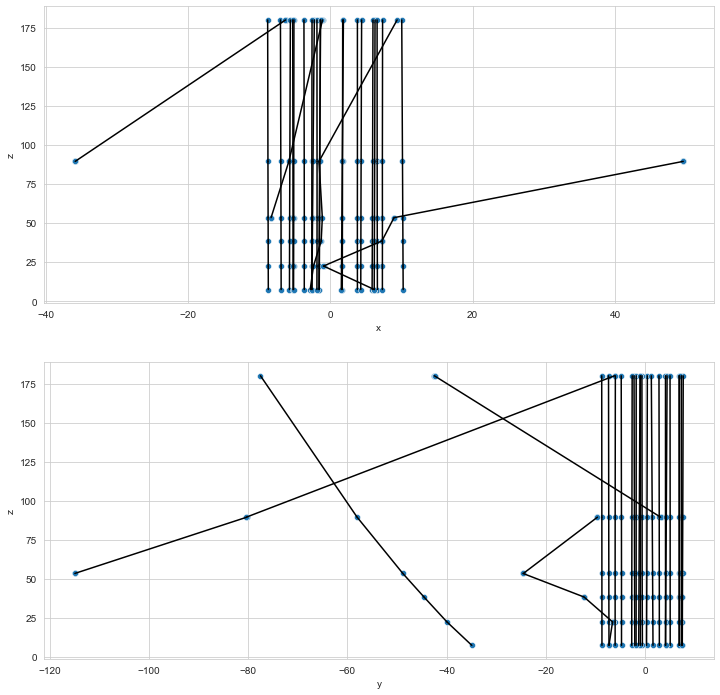

In [36]:
fig, axs = pyplot.subplots(2, figsize=(12, 12))
col = 'RecTrk1'
d = load_data(r'/Users/avencast/CLionProjects/darkshine-simulation/workspace/Tracker_GNN.root', col, event=0)
d = process_graph_data(d, col)
plot_xyz(axs[0], d, "x", "z", )
plot_xyz(axs[1], d, "y", "z", )
